In [44]:
# check current path
import os
print(os.getcwd())

# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/')

/content/drive/Shareddrives/Enova/2023/Project_decription
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
path_gdrive = '/content/drive/Shareddrives/Enova/2023/Project_decription'
os.chdir(path_gdrive)
print(os.getcwd())

/content/drive/Shareddrives/Enova/2023/Project_decription


In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from matplotlib.colors import ListedColormap
import math
from collections import Counter
from xgboost import XGBRegressor
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [47]:
test_data = pd.read_csv('data_smackdown_2023_validation.csv')
test_data.shape

(10000, 21)

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   age                        10000 non-null  int64  
 2   residence_type             10000 non-null  object 
 3   address                    10000 non-null  object 
 4   education_level            10000 non-null  object 
 5   job_type                   9087 non-null   object 
 6   number_years_at_job        10000 non-null  int64  
 7   marital_status             10000 non-null  int64  
 8   num_tickets_purchased      10000 non-null  float64
 9   last_ticket_purchase_year  5889 non-null   float64
 10  other_tickets_purchased    8245 non-null   object 
 11  gym_membership_ind         10000 non-null  int64  
 12  prior_year_spend           7099 non-null   float64
 13  prior_year_spend_external  7996 non-null   floa

In [49]:
train_data = pd.read_csv('data_smackdown_2023_training.csv')
train_data.shape

(10001, 22)

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        10001 non-null  int64  
 1   residence_type             10001 non-null  object 
 2   address                    10001 non-null  object 
 3   education_level            10001 non-null  object 
 4   job_type                   9054 non-null   object 
 5   number_years_at_job        10001 non-null  int64  
 6   marital_status             10001 non-null  int64  
 7   num_tickets_purchased      10001 non-null  float64
 8   last_ticket_purchase_year  5867 non-null   float64
 9   other_tickets_purchased    8192 non-null   object 
 10  gym_membership_ind         10001 non-null  int64  
 11  prior_year_spend           7164 non-null   float64
 12  prior_year_spend_external  8053 non-null   float64
 13  primary_credit_card        8053 non-null   obj

In [51]:
train_data.head(3)

,age,residence_type,address,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,last_ticket_purchase_year,other_tickets_purchased,...,prior_year_spend_external,primary_credit_card,last_activity_social,other_streaming_services,cable_provider,search_history_summary,rating_history,promotion_type,conversion_ind,ltv
0,74,U,"164 Gonzalez Common, Brittanyberg, FL 32854",grad_high_school,government,10,1,1.00,"2,019.00","['bsb', 'fb', 'fb', 'fb', 'c']",...,5.20,maincard,2018-01-17,3,Fish Network,"['majorwrestlingmagazine.com', 'firstwildlifec...",NaN,bronze,0.00,0.00
1,51,U,"23531 Christopher Points Unit 185, Lake Daniel...",phd,healthcare,7,0,2.00,"2,013.00","['c', 'bsb', 'fb', 'c', 'c', 'bxb', 'fb', 'c',...",...,247.43,maincard,2020-05-16,2,Cheezeline,"['totaltechnews.com', 'firstoutdoorreport.com'...",NaN,bronze,1.00,"3,147.90"
2,42,U,"90970 Aguirre Isle Apt. 387, South Laurastad, ...",grad_high_school,service,7,1,4.00,"2,011.00","['c', 'fb', 'fb', 'fb', 's', 's', 'fb', 'fb', ...",...,69.45,passport,NaN,5,Spectral,"['totalpoliticsclips.com', 'dailyfinancenews.c...",NaN,bronze,0.00,0.00


<AxesSubplot:>

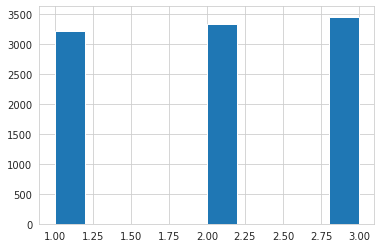

In [52]:
#deal with dependent variable 
train_data['promotion_type'] = train_data['promotion_type'].map({'gold':1,"silver":2,"bronze":3})
train_data['promotion_type'].hist()

In [53]:
#filter out numerical variables and categorical variables
train_data.dtypes.value_counts()
num_df=train_data.select_dtypes(include=np.number)
cg_train_data=train_data.select_dtypes(include='object')
num_df.head(3)

,age,number_years_at_job,marital_status,num_tickets_purchased,last_ticket_purchase_year,gym_membership_ind,prior_year_spend,prior_year_spend_external,other_streaming_services,promotion_type,conversion_ind,ltv
0,74,10,1,1.00,"2,019.00",1,9.10,5.20,3,3,0.00,0.00
1,51,7,0,2.00,"2,013.00",0,27.45,247.43,2,3,1.00,"3,147.90"
2,42,7,1,4.00,"2,011.00",0,63.63,69.45,5,3,0.00,0.00


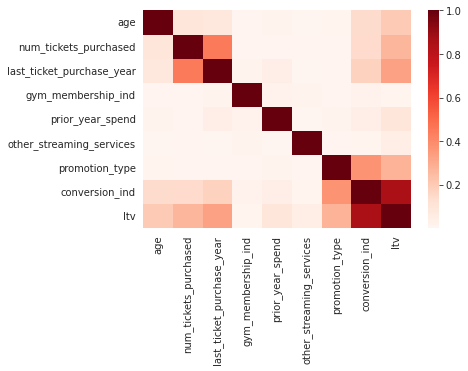

In [54]:
#heatmap of numerical variables correlation   
#temporarily fill missing numerical variables with 0
num_df=num_df.fillna(0)
highcorr_num_df=num_df.loc[:,num_df.corr().abs()['promotion_type']>0.005]
corrs=highcorr_num_df.corr().abs()
heatmap=sns.heatmap(corrs,cmap='Reds')

<AxesSubplot:>

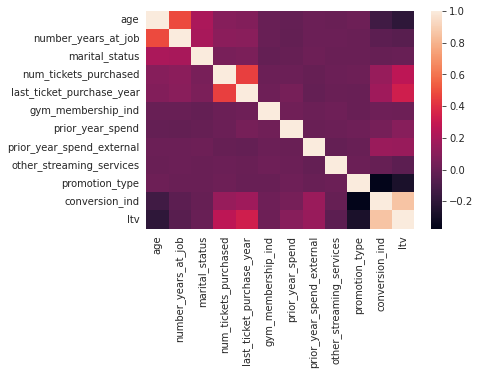

In [55]:
sns.heatmap(num_df.corr())

In [56]:
#Temporarily fill catergorical missing vlue 
cols=cg_train_data.columns
cg_train_data.fillna('None',inplace=True)
cg_train_data.isnull().sum()
cg_train_data['promotion_type']=train_data['promotion_type']


/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-56-fb292c54ae50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cg_train_data['promotion_type']=train_data['promotion_type']


In [57]:
cols=cg_train_data.columns
cols

Index(['residence_type', 'address', 'education_level', 'job_type',
       'other_tickets_purchased', 'primary_credit_card',
       'last_activity_social', 'cable_provider', 'search_history_summary',
       'rating_history', 'promotion_type'],
      dtype='object')

<AxesSubplot:xlabel='residence_type', ylabel='promotion_type'>

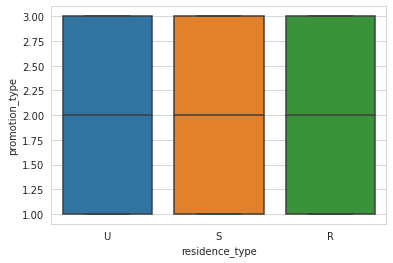

In [58]:
sns.boxplot(x='residence_type',y='promotion_type',data=cg_train_data)

<AxesSubplot:xlabel='education_level', ylabel='promotion_type'>

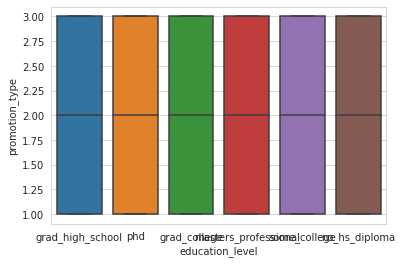

In [59]:
sns.boxplot(x='education_level',y='promotion_type',data=cg_train_data)

<AxesSubplot:xlabel='primary_credit_card', ylabel='promotion_type'>

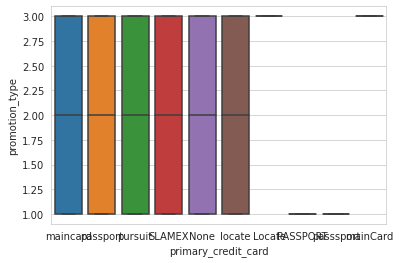

In [60]:
sns.boxplot(x='primary_credit_card',y='promotion_type',data=cg_train_data)

<AxesSubplot:xlabel='job_type', ylabel='promotion_type'>

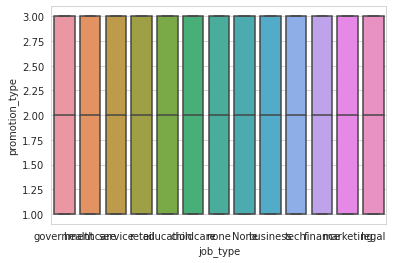

In [61]:
sns.boxplot(x='job_type',y='promotion_type',data=cg_train_data)

<AxesSubplot:xlabel='cable_provider', ylabel='promotion_type'>

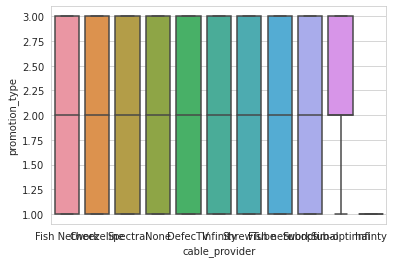

In [62]:
sns.boxplot(x='cable_provider',y='promotion_type',data=cg_train_data)

### Deal with NA values

catergorical missing value

Text(0.5, 1.0, 'The percentage of missing values per column')

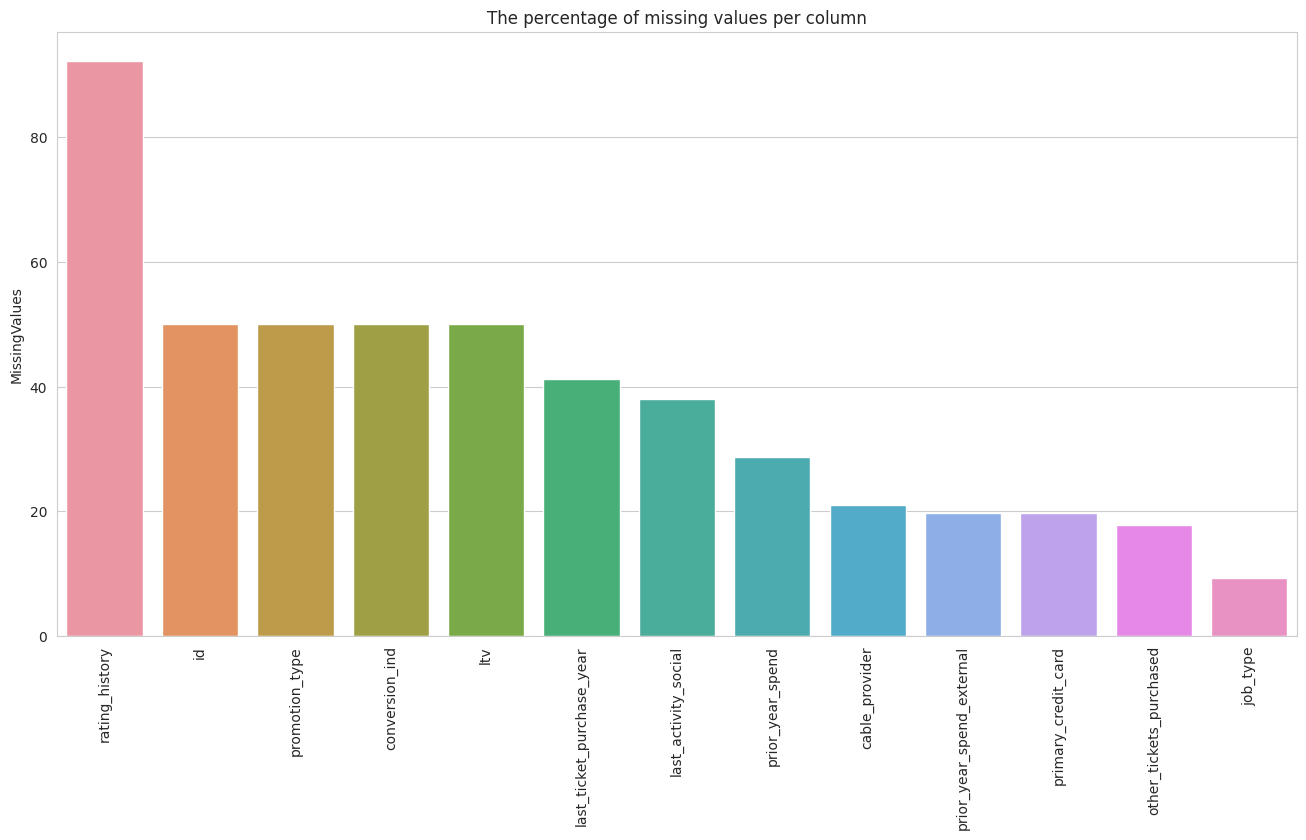

In [63]:
#visualize NA values
test_data = pd.read_csv('data_smackdown_2023_validation.csv')
all_df=pd.concat([train_data,test_data], ignore_index=True,sort=False)
missings_df={}
for key in all_df.columns:
    if all_df[key].isnull().sum() > 0:
        missings_df[key]=(all_df[key].isnull().sum()  /  len(all_df[key]) ) * 100

#Create missing values dataframe
missings_df=pd.DataFrame(missings_df,index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)


#Plotting number of missing values per column
plt.figure(figsize=(16,8),dpi=100)
plt.xticks(rotation=90)
sns.barplot(y=missings_df.MissingValues,x=missings_df.index, orient='v').set_title('The percentage of missing values per column')
#dpi=100 orient='v'

In [64]:
# Deal with abnormal categorical value (according to related variables)
tmp_bool = train_data['job_type'].isna()
train_data.loc[tmp_bool, ['job_type', 'number_years_at_job']]
tmp_bool = (train_data['job_type'].isna() & train_data['number_years_at_job']>0)
train_data.loc[tmp_bool, ['job_type', 'number_years_at_job']]


,job_type,number_years_at_job
11,NaN,9
15,NaN,5
21,NaN,9
51,NaN,7
54,NaN,5
...,...,...
9814,NaN,1
9822,NaN,9
9827,NaN,1
9877,NaN,11


In [65]:
tmp_bool2 = train_data['num_tickets_purchased'].isna()
train_data.loc[tmp_bool2, ['num_tickets_purchased', 'last_ticket_purchase_year']]
tmp_bool2 = (train_data['num_tickets_purchased'].isna() & train_data['last_ticket_purchase_year']>0)
train_data.loc[tmp_bool2, ['num_tickets_purchased', 'last_ticket_purchase_year']]

,num_tickets_purchased,last_ticket_purchase_year


In [66]:
#After reading the data description and some sanity check we can fill 
#some of the missing categorical features with 'None', and some with most frequent category

# Fill with None (TOP15 categorical variables with most missing values)
fill_cols = ['rating_history',
            'last_ticket_purchase_year',
            'last_activity_social',
            'prior_year_spend',
            'primary_credit_card',
            'other_tickets_purchased',
            'job_type',
            'cable_provider'
            ]
for col in fill_cols:
    train_data[col].fillna('None', inplace=True)


numerical missing value

In [67]:
num_cols = train_data.columns[train_data.isna().any()]
train_data[num_cols].describe().T.sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
prior_year_spend_external,"8,053.00",152.96,148.57,0.01,47.71,110.50,212.07,"1,295.81"


In [68]:
train_data['prior_year_spend'] = train_data['prior_year_spend'].interpolate()
train_data['prior_year_spend_external'] = train_data['prior_year_spend_external'].interpolate()

 Final process

In [69]:
#df = train_data.copy()

In [70]:
#drop columns 
#df.drop(['customerID', 'churn'], axis=1, inplace=True)

In [71]:
#df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [72]:
train_data['prior_year_spend'] = train_data['prior_year_spend'].interpolate()
train_data['prior_year_spend_external'] = train_data['prior_year_spend_external'].interpolate()

In [73]:
abs(train_data.corr()['ltv']).sort_values(ascending=False)

ltv                         1.00
conversion_ind              0.86
promotion_type              0.27
num_tickets_purchased       0.27
age                         0.20
number_years_at_job         0.06
other_streaming_services    0.05
prior_year_spend_external   0.02
gym_membership_ind          0.01
marital_status              0.00
Name: ltv, dtype: float64

In [74]:
abs(train_data.corr()['conversion_ind']).sort_values(ascending=False)

conversion_ind              1.00
ltv                         0.86
promotion_type              0.37
num_tickets_purchased       0.14
age                         0.14
number_years_at_job         0.04
prior_year_spend_external   0.04
gym_membership_ind          0.02
other_streaming_services    0.01
marital_status              0.01
Name: conversion_ind, dtype: float64

In [75]:
for i in range(len(train_data['promotion_type'])):
  if train_data['promotion_type'][i] == 1:
    train_data['profit'] = train_data['ltv'] - 1400
  if train_data['promotion_type'][i] == 2:
    train_data['profit'] = train_data['ltv'] - 1100
  if train_data['promotion_type'][i] == 3:
    train_data['profit'] = train_data['ltv'] - 500

In [76]:
train_data['searched_wrest'] = train_data['search_history_summary'].str.contains('wrest|fight')
train_data['searched_wrest'] = train_data['searched_wrest'].map({True:1,False:0})

In [77]:
validation_data = pd.read_csv('data_smackdown_2023_validation.csv')
validation_data.head()

validation_data['prior_year_spend'] = validation_data['prior_year_spend'].interpolate()
validation_data['prior_year_spend_external'] = validation_data['prior_year_spend_external'].interpolate()
for i in range(len(validation_data['promotion_type'])):
  if validation_data['promotion_type'][i] == 1:
    validation_data['profit'] = validation_data['ltv'] - 1400
  if validation_data['promotion_type'][i] == 2:
    validation_data['profit'] = validation_data['ltv'] - 1100
  if validation_data['promotion_type'][i] == 3:
    validation_data['profit'] = validation_data['ltv'] - 500

fill_cols = ['rating_history',
            'last_ticket_purchase_year',
            'last_activity_social',
            'prior_year_spend',
            'primary_credit_card',
            'other_tickets_purchased',
            'job_type',
            'cable_provider'
            ]
for col in fill_cols:
    validation_data[col].fillna('None', inplace=True)

validation_data['searched_wrest'] = validation_data['search_history_summary'].str.contains('wrest|fight')
validation_data['searched_wrest'] = validation_data['searched_wrest'].map({True:1,False:0})

In [78]:
train_data.shape

(10001, 24)

In [79]:
test_data.shape

(10000, 21)

In [80]:
train_data = train_data.drop(['address', 'cable_provider', 'search_history_summary', 
                              'last_ticket_purchase_year','rating_history', 'last_activity_social',
                              'profit', 'other_tickets_purchased'], axis=1)
train_data.head(3)

,age,residence_type,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,gym_membership_ind,prior_year_spend,prior_year_spend_external,primary_credit_card,other_streaming_services,promotion_type,conversion_ind,ltv,searched_wrest
0,74,U,grad_high_school,government,10,1,1.00,1,9.10,5.20,maincard,3,3,0.00,0.00,1
1,51,U,phd,healthcare,7,0,2.00,0,27.45,247.43,maincard,2,3,1.00,"3,147.90",1
2,42,U,grad_high_school,service,7,1,4.00,0,63.63,69.45,passport,5,3,0.00,0.00,1


In [81]:
validation_data = validation_data.drop(['address', 'last_ticket_purchase_year', 'cable_provider',
                                        'rating_history', 'last_activity_social', 'other_tickets_purchased',
                                        'search_history_summary', 'promotion_type', 'id'], axis=1)
validation_data.head(3)

,age,residence_type,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,gym_membership_ind,prior_year_spend,prior_year_spend_external,primary_credit_card,other_streaming_services,searched_wrest
0,44,S,no_hs_diploma,none,14,1,9.00,0,26.79,98.26,maincard,4,0
1,31,U,grad_college,education,7,0,25.00,1,21.11,226.93,SLAMEX,1,0
2,28,S,grad_high_school,service,8,0,0.00,0,15.44,21.84,passport,2,0


In [82]:
train_data.to_csv('train_transformed.csv', index=False)
validation_data.to_csv('val_transformed.csv', index=False)

In [83]:
#train_data.prior_year_spend_external.value_counts()

In [84]:
#train_data.info()

In [85]:
#validation_data.info()